## Ładowanie pakietów

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Ładowanie danych

In [96]:
netflix = pd.read_csv("netflix_data.csv")
netflix

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
...,...,...,...,...,...,...,...,...,...,...,...
4807,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,88,Looking to survive in a world taken over by zo...,Comedies
4808,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,94,A drug dealer starts having doubts about his t...,Dramas
4809,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
4810,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas


## Analizy

### Analiza gatunków filmów i seriali

In [102]:
genre_count = netflix.groupby(['genre']).count()['show_id'].sort_values(ascending = False).rename('count')
netflix['genre_2'] = netflix['genre'].apply(lambda x : 'Other' if genre_count[x] < 20 else x)
genres = netflix.groupby(['genre_2']).count()['show_id'].sort_values(ascending = False).rename('count')

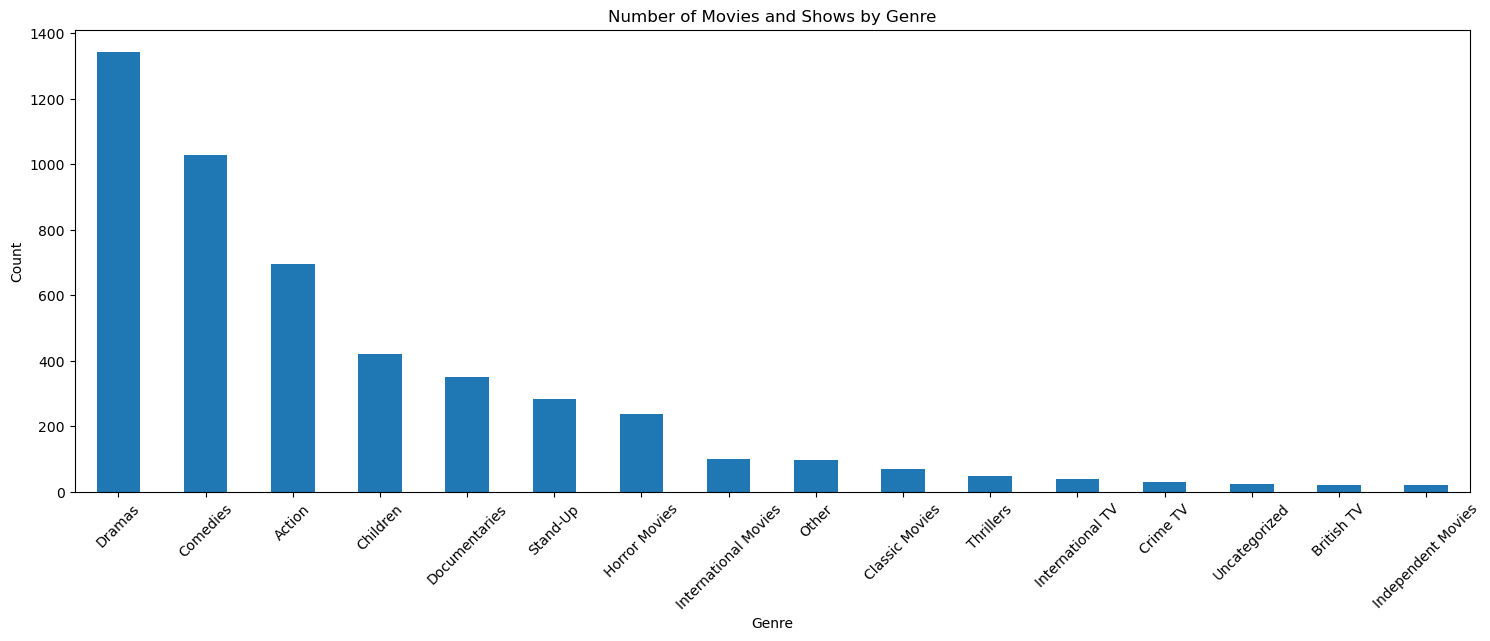

In [103]:
plt.figure(figsize=(18, 6))
genres.plot(kind = 'bar')
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Number of Movies and Shows by Genre")
plt.xticks(rotation = 45)
plt.show() 

### Analiza względem kraju

In [147]:
country_count = netflix.groupby(['country']).count()['show_id'].sort_values(ascending = False)
quantile_75 = netflix.groupby(['country']).count()['show_id'].sort_values(ascending = False).quantile(0.75)
netflix['country_2'] = netflix['country'].apply(lambda x : 'Other' if  country_count.get(x, 0) < quantile_75 else x)
countries = pd.DataFrame(netflix.groupby(['country_2']).count()['show_id'].sort_values(ascending = False))
countries

,show_id
country_2,
United States,1886
India,864
Other,487
United Kingdom,311
Canada,155
France,133
Spain,112
Egypt,91
Turkey,81


In [148]:
continents = pd.read_csv('continents-according-to-our-world-in-data.csv')
continents = continents.rename(columns={'World regions according to OWID': 'continents',
                                        'Entity' : 'country'})
continents = continents[['country', 'continents']]
continents

,country,continents
0,Afghanistan,Asia
1,Aland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania
...,...,...
266,Yemen Arab Republic,Asia
267,Yemen People's Republic,Asia
268,Yugoslavia,Europe
269,Zambia,Africa


In [187]:
merged_df = countries.merge(continents, how='left', left_on='country_2', right_on='country')
merged_df.loc[merged_df['country'].isna(), 'country'] = 'Other'
merged_df.loc[merged_df['country'] == 'Other', 'continents'] = 'Not applicable'
merged_df

,show_id,country,continents
0,1886,United States,North America
1,864,India,Asia
2,487,Other,Not applicable
3,311,United Kingdom,Europe
4,155,Canada,North America
5,133,France,Europe
6,112,Spain,Europe
7,91,Egypt,Africa
8,81,Turkey,Asia
9,81,Japan,Asia


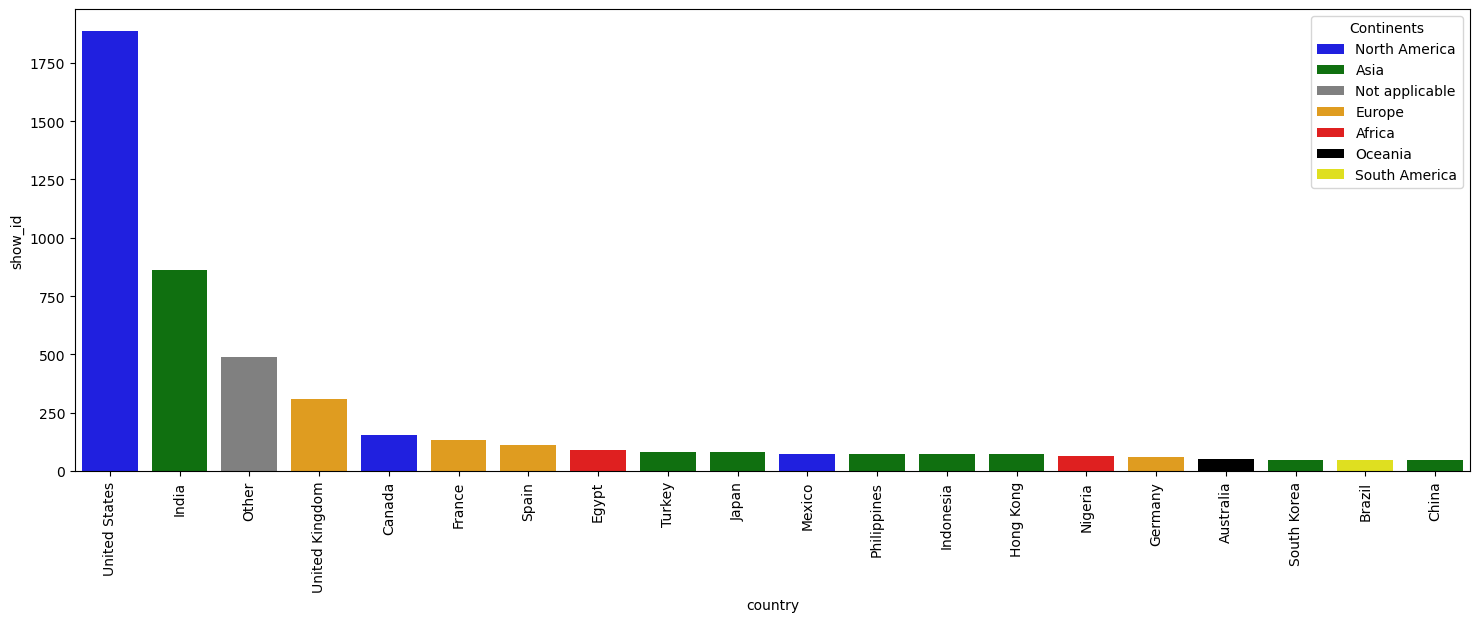

In [204]:
plt.figure(figsize=(18, 6))

sns.barplot(data=merged_df, x='country', y='show_id', hue='continents', dodge=False, 
            palette={'North America': 'blue', 
                     'Asia': 'green', 
                     'Europe': 'orange', 
                     'Africa' : 'red', 
                     'Oceania' : 'black', 
                     'South America' : 'yellow',
                     'Not applicable': 'gray'})
plt.xticks(rotation=90)
plt.legend(title="Continents", loc='upper right')
plt.show()